In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### ARモデル
- $y_t = c + \sum_{i=1}^{p}\phi_i y_{t - i} + \epsilon_t, \, \epsilon_t \sim N(0, \sigma^2)$
- 要は，過去の自分のデータを説明変数とした回帰モデル
- 過去の自分のデータをモデルに組み込むことで自己相関を表現
- 定常条件は$1 - \phi_iz-...-\phi_pz^p=0$の解の絶対値が1より大きい

#### MAモデル
- $y_t = \mu + \sum_{j=1}^{q}\theta_j \epsilon_{t-j} + \epsilon_{t}, \, \epsilon_t \sim N(0, \sigma^2)$
  - $\epsilon_t$はノイズ，$\theta$はある程度自由に設定可能
- 「過去と未来で共通の値を使用する」ことで自己相関を表現
- 反転可能性を満たす条件は，$1+\theta_1z+...+\theta_qz^q=0$

#### ARMAモデル
- $y_t = c + \sum_{i=1}^{p}\phi_iy_{t-i}+\epsilon_t+\sum_{j=1}^q\theta_j\epsilon_{t-j}$

#### ARIMAモデル
- 自己回帰和分移動平均モデル
  - 非定常過程に対してARMAを使うことができない
  - 和文家庭に対しては，差分をとることで定常過程に変換することができる
  - 差分をとってからARMAモデルを推定すること

#### SARIMAモデル
- ARIMAに季節成分を入れたもの
  - 例えば，月単位の気温データだとしたら，去年の同じ月の値をモデルに入れる
- 1周期がsであるデータ(月単位データならs=12)において，ARIMAの次数(p,d,q)と，季節性の字数(P,D,Q)をあわせて，$SARIMA(p,d,q)(P,D,Q)[s]$と表記する
  - 季節階差をとったデータに対するARIMAモデル

#### ARIMAXモデル
- 外生変数が入ったARIMAモデル
- $y_t = c + \sum_{i=1}^{p}\phi_iy_{t-i} + \epsilon_t + \sum_{j=1}^{q}\theta_j\epsilon_{t-j} + \sum_{k=1}^{r}\beta_kx_{k,t}$
  - $r$個の説明変数，時点$t$における$k$番目の変数を$x_{k,t}$
- ARIMA Errorモデルと言う見方もある
  - 線形回帰モデルをデータに適用する
  - 線形回帰モデルの残差に対してARIMAモデルを適用する
  - やってることはARIMAXと一緒

### モデルの同定
- ARMAの場合
  - 次数の決定：モデル選択
  - 差分の階数の決定：単位根検定
  - モデルの評価
- モデルの同定とパラメタの推定は一緒じゃない．間違えやすいので注意
  - ARMAの場合，$\phi$を求めることがパラメタ推定

#### AIC
- 尤度：パラメタが与えられたときに，手持ちのデータが得られる確率
  - 小さい値になりやすいので対数として取り扱う事が多い
  - 対数尤度を最大にするパラメタを推定量として使用することを「最尤法」と呼ぶ
- AIC：-2(最大化対数尤度)+2(推定されたパラメータの数)
  - 尤度にパラメタという罰則項を入れた式
  - モデルが複雑になりすぎるのを防ぐ

### 単位根検定
- 差分階数を決定するもの

#### KPSS検定
- 帰無仮説：単位根なし 対立仮説：単位根あり
  - 危険率5%で優位となったならば，差分を取るべきだと判断
- $y_t = \alpha + \beta t + \sum_{i=1}^{t}u_i+\epsilon_t$
  - $\epsilon_t$は定常過程であり，$u_i \sim iid(0, \sigma_u^2)$
  - 帰無仮説：$\sigma_u^2=0$ 対立仮説：$\sigma_u^2 \neq 0$
  
#### ADF検定
- 帰無仮説：単位根あり 対立仮説：単位根なし
- AR(1)モデルの場合(DF検定)
  - $y_t=\phi_1y_{t-1}+\epsilon_{t}, \, \epsilon_t \sim N(0, \sigma^2)$
  - 帰無仮説：$\phi_1=1$ 対立仮説：$|\phi_i| < 1$
- DF検定の拡張がADF検定

------

In [2]:
df = pd.read_csv("Seatbelts.csv")
df["date"] = pd.date_range(start="1969-01", periods=len(df), freq="M")
df.head()

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law,date
0,107,1687,867,269,9059,0.102972,12,0,1969-01-31
1,97,1508,825,265,7685,0.102363,6,0,1969-02-28
2,102,1507,806,319,9963,0.102062,12,0,1969-03-31
3,87,1385,814,407,10955,0.100873,8,0,1969-04-30
4,119,1632,991,454,11823,0.101020,10,0,1969-05-31


raw


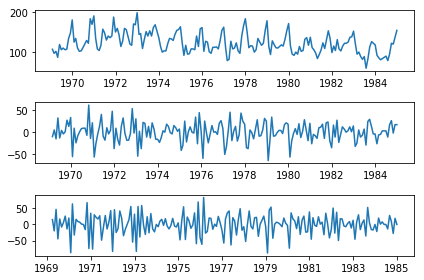

log


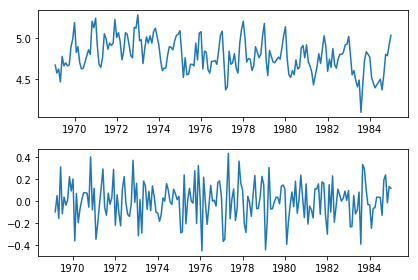

In [3]:
df["DriversKilled_1d"] = df["DriversKilled"] - df["DriversKilled"].shift()
df["DriversKilled_2d"] = df["DriversKilled_1d"] - df["DriversKilled_1d"].shift()
print("raw")
plt.subplot(311)
plt.plot(df["date"], df["DriversKilled"])
plt.subplot(312)
plt.plot(df["date"], df["DriversKilled_1d"])
plt.subplot(313)
plt.plot(df["date"], df["DriversKilled_2d"])
plt.tight_layout()
plt.show()
df["DriversKilled_log"] = df["DriversKilled"].apply(np.log)
df["DriversKilled_log_1d"] = df["DriversKilled_log"] - df["DriversKilled_log"].shift()
print("log") 
plt.subplot(211)
plt.plot(df["date"], df["DriversKilled_log"])
plt.subplot(212)
plt.plot(df["date"], df["DriversKilled_log_1d"]) 
plt.tight_layout()
plt.show()

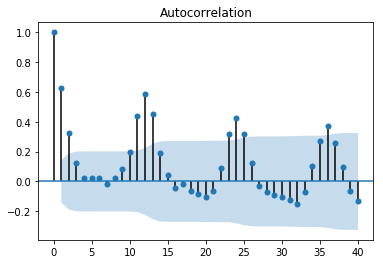

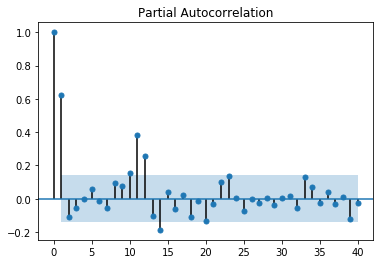

In [4]:
ts_acf = sm.tsa.stattools.acf(df["DriversKilled"],nlags=40)
#print(ts_acf)
sm.graphics.tsa.plot_acf(df["DriversKilled"], lags=40)
plt.show()

ts_acf = sm.tsa.stattools.pacf(df["DriversKilled"],nlags=40)
#print(ts_acf)
sm.graphics.tsa.plot_pacf(df["DriversKilled"], lags=40)
plt.show()

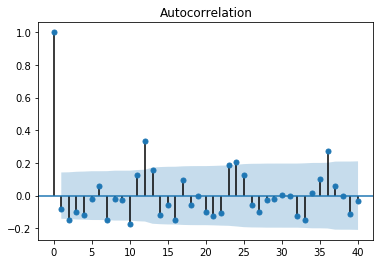

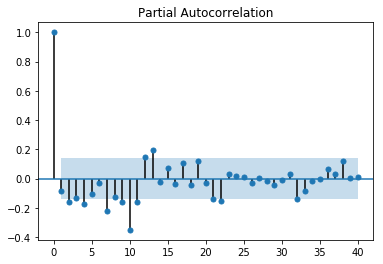

In [5]:
ts_acf = sm.tsa.stattools.acf(df["DriversKilled_log_1d"].dropna(),nlags=40)
#print(ts_acf)
sm.graphics.tsa.plot_acf(df["DriversKilled_log_1d"].dropna(), lags=40)
plt.show()

ts_acf = sm.tsa.stattools.pacf(df["DriversKilled_log_1d"].dropna(),nlags=40)
#print(ts_acf)
sm.graphics.tsa.plot_pacf(df["DriversKilled_log_1d"].dropna(), lags=40)
plt.show()

/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


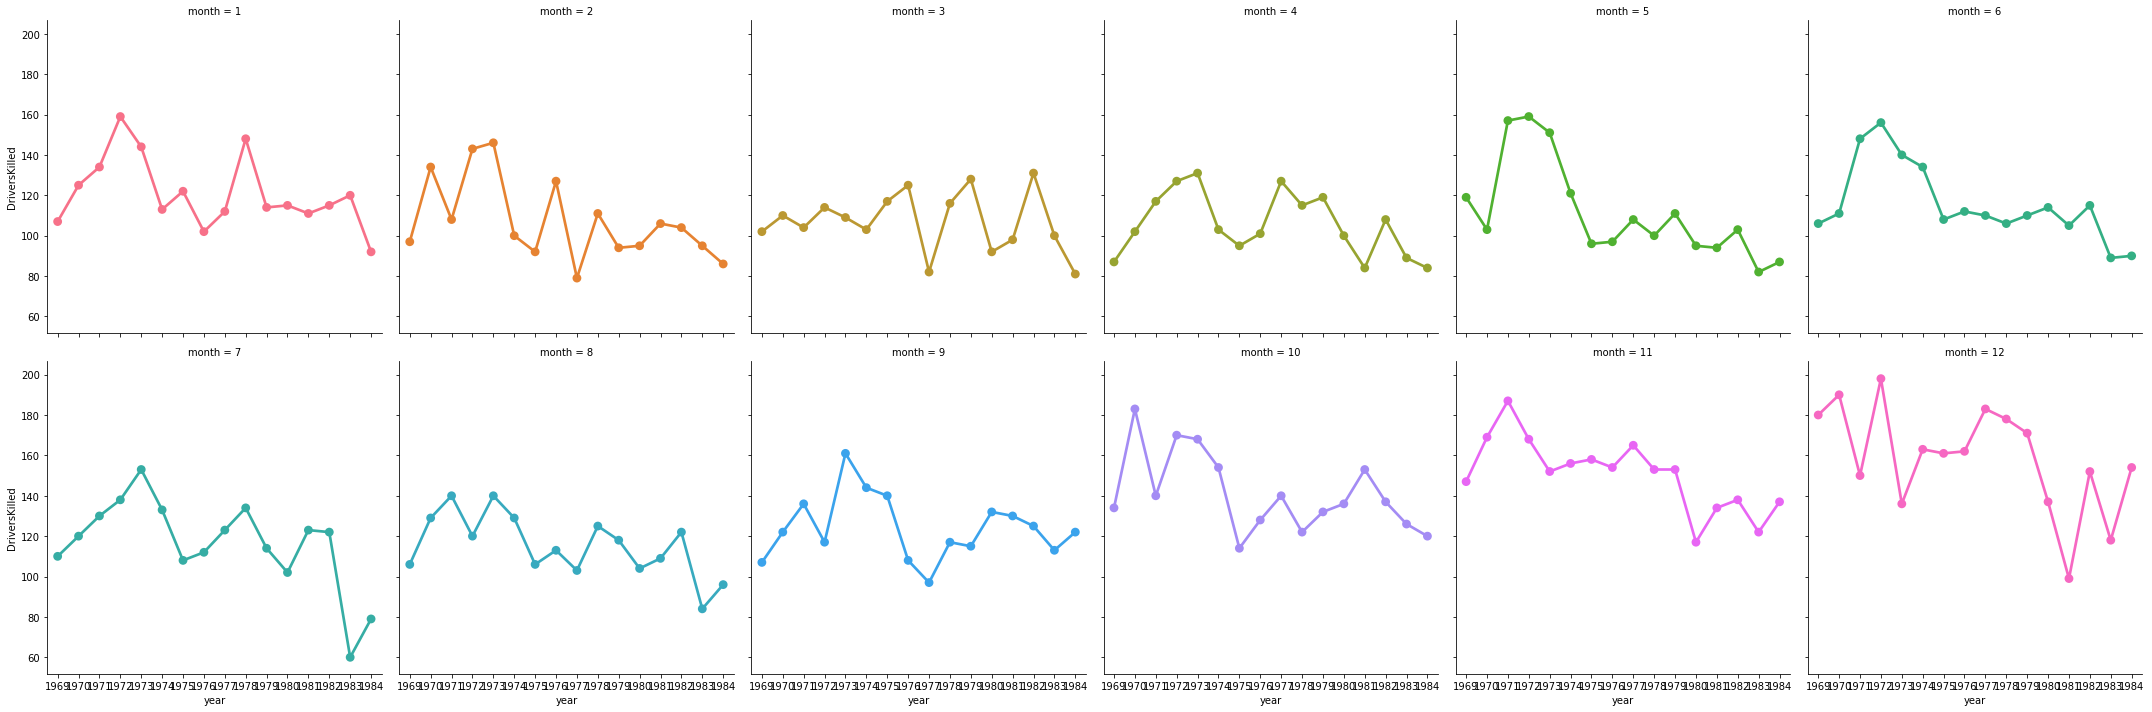

In [6]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
grid = sns.FacetGrid(df, col="month", hue="month", col_wrap=6, size=5)
grid.map(sns.pointplot, "year", "DriversKilled")

In [7]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 15 columns):
DriversKilled           192 non-null int64
drivers                 192 non-null int64
front                   192 non-null int64
rear                    192 non-null int64
kms                     192 non-null int64
PetrolPrice             192 non-null float64
VanKilled               192 non-null int64
law                     192 non-null int64
date                    192 non-null datetime64[ns]
DriversKilled_1d        191 non-null float64
DriversKilled_2d        190 non-null float64
DriversKilled_log       192 non-null float64
DriversKilled_log_1d    191 non-null float64
year                    192 non-null int64
month                   192 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(9)
memory usage: 22.6 KB
None


,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law,date,DriversKilled_1d,DriversKilled_2d,DriversKilled_log,DriversKilled_log_1d,year,month
0,107,1687,867,269,9059,0.102972,12,0,1969-01-31,NaN,NaN,4.672829,NaN,1969,1
1,97,1508,825,265,7685,0.102363,6,0,1969-02-28,-10.0,NaN,4.574711,-0.098118,1969,2
2,102,1507,806,319,9963,0.102062,12,0,1969-03-31,5.0,15.0,4.624973,0.050262,1969,3
3,87,1385,814,407,10955,0.100873,8,0,1969-04-30,-15.0,-20.0,4.465908,-0.159065,1969,4
4,119,1632,991,454,11823,0.101020,10,0,1969-05-31,32.0,47.0,4.779123,0.313215,1969,5


In [8]:
import pandas_profiling

/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in la

In [9]:
pandas_profiling.ProfileReport(df)

Number of variables,15
Number of observations,192
Total Missing (%),0.1%
Total size in memory,22.6 KiB
Average record size in memory,120.4 B
Numeric,11
Categorical,0
Boolean,1
Date,1
Text (Unique),0
Rejected,2


In [10]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df.set_index("date")["DriversKilled_log_1d"].dropna().astype(float).values,maxlag=14, regression='nc', autolag="AIC", regresults=True)
dftest

(-5.992605150740061,
 9.756042162262692e-09,
 {'1%': -2.578415148339856,
  '10%': -1.61540902618413,
  '5%': -1.942609657552318},
 <statsmodels.tsa.stattools.ResultsStore at 0x1c17188198>)

In [11]:
len(df.set_index("date")["DriversKilled_log_1d"].dropna().astype(float))

191

/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  import sys


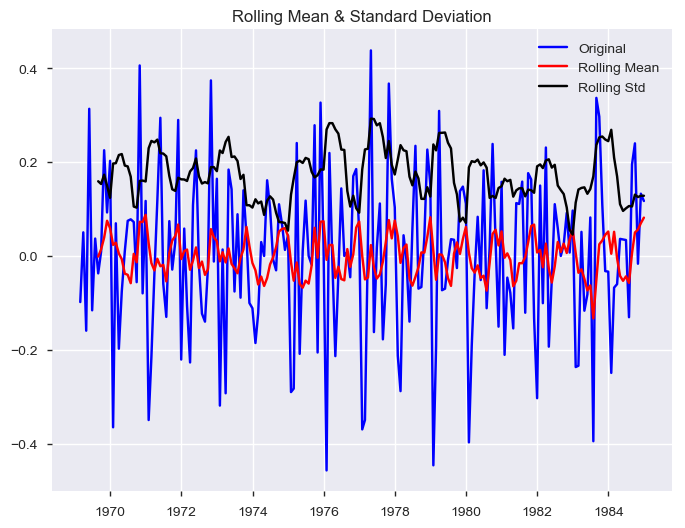

Results of Dickey-Fuller Test:
Test Statistic                -1.131347e+01
p-value                        1.222730e-20
#Lags Used                     1.000000e+01
Number of Observations Used    1.800000e+02
Critical Value (1%)           -3.467211e+00
Critical Value (5%)           -2.877735e+00
Critical Value (10%)          -2.575403e+00
dtype: float64


In [12]:
# http://jbclub.xii.jp/?p=695

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=7)
    rolstd = pd.rolling_std(timeseries, window=7)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(8, 6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Augmented Dickey-Fuller unit root test:
    # http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
    print ("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, maxlag=int(12*(len(timeseries)/100)**0.25), regression='c', autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(df.set_index("date")["DriversKilled_log_1d"].dropna().astype(float))

- DF検定
  - 時系列標本が単位根を持つかどうかの仮説検定
  - 帰無仮説$\gamma=0$,対立仮説$\gamma < 0$
  - 以下のようなモデルに適用
  
$\delta y_t=\alpha+\beta t + \gamma y_{t-1} + \sigma_1\delta y_{t-1} ... + \sigma_{p-1}\delta y_{t-1+p} + \epsilon_t$
  
  - $\alpha$は定数，$\beta$は時間トレンドの係数，$p$は自己回帰過程のラグ数
  - 検定の際はラグの長さpを決める必要がある
    
    - AIC,BIC,Hannan-Quinnなどを利用することが多い

- 上の例だと，p値がかなり小さいので，帰無仮説は棄却され，単位根は存在しないとなる

In [13]:
from sklearn.model_selection import TimeSeriesSplit

In [14]:
n_splits = 5
max_train_size = None
tscv = TimeSeriesSplit(n_splits=n_splits, max_train_size=max_train_size)
for train_idx, test_idx in tscv.split(df.as_matrix()):
    print(f"train_idx : {train_idx}\ntest_idx : {test_idx}\n")
    print(f"train_idx_length : {len(train_idx)}\ntest_idx_length : {len(test_idx)}\n\n")

train_idx : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
test_idx : [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]

train_idx_length : 32
test_idx_length : 32


train_idx : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
test_idx : [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87
 88 89 90 91 92 93 94 95]

train_idx_length : 64
test_idx_length : 32


train_idx : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
test_idx : [ 96  97  98  99 100 101 102 103 104 105 106 107 108 

- 時系列をCVするとき，いくつかやり方がある
- sklearnのTimeSeriesSplitの例が上．５交差だとしたら以下のようなイメージ

| n回目 | 1 | 2 | 3 | 4 | 5 | 6 |
|----|----|----|----|----|----|----|
| 1回目 | train | test | -- | -- | -- | -- |
| 2回目 | train | train | test | -- | -- | -- |
| 3回目 | train | train | train | test | -- | -- |
| 4回目 | train | train | train | train | test | -- |
| 4回目 | train | train | train | train | train | test |

In [15]:
n_splits = 5
max_train_size = int(len(df) / (n_splits + 1))
tscv = TimeSeriesSplit(n_splits=n_splits, max_train_size=max_train_size)
for train_idx, test_idx in tscv.split(df.as_matrix()):
    print(f"train_idx : {train_idx}\ntest_idx : {test_idx}\n")
    print(f"train_idx_length : {len(train_idx)}\ntest_idx_length : {len(test_idx)}\n\n")

train_idx : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
test_idx : [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]

train_idx_length : 32
test_idx_length : 32


train_idx : [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
test_idx : [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87
 88 89 90 91 92 93 94 95]

train_idx_length : 32
test_idx_length : 32


train_idx : [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87
 88 89 90 91 92 93 94 95]
test_idx : [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127]

train_idx_length : 32
test_idx_length : 32


train_idx : [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
test_idx : [128 129 130 

- max_train_sizeによって，トレーニングに使うデータ長を固定できる

| n回目 | 1 | 2 | 3 | 4 | 5 | 6 |
|----|----|----|----|----|----|----|
| 1回目 | train | test | -- | -- | -- | -- |
| 2回目 | -- | train | test | -- | -- | -- |
| 3回目 | -- | -- | train | test | -- | -- |
| 4回目 | -- | -- | -- | train | test | -- |
| 4回目 | -- | -- | -- | -- | train | test |

In [16]:
max_train_size = 4
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits, max_train_size=max_train_size)
for train_idx, test_idx in tscv.split(np.zeros(12)):
    print(f"train_idx : {train_idx}\ntest_idx : {test_idx}\n")
    print(f"train_idx_length : {len(train_idx)}\ntest_idx_length : {len(test_idx)}\n\n")

train_idx : [0 1]
test_idx : [2 3]

train_idx_length : 2
test_idx_length : 2


train_idx : [0 1 2 3]
test_idx : [4 5]

train_idx_length : 4
test_idx_length : 2


train_idx : [2 3 4 5]
test_idx : [6 7]

train_idx_length : 4
test_idx_length : 2


train_idx : [4 5 6 7]
test_idx : [8 9]

train_idx_length : 4
test_idx_length : 2


train_idx : [6 7 8 9]
test_idx : [10 11]

train_idx_length : 4
test_idx_length : 2




- n_splitを，　全体からトレーニングサイズを引いたものにしてあげれば，上の例だと，20点学習で次の１点をテストというのを作ることができる

In [17]:
# https://logics-of-blue.com/python-time-series-analysis/
# ARMA推定関数の実行，情報量基準，トレンドの有無が引数
res = sm.tsa.arma_order_select_ic(df["DriversKilled_log_1d"].dropna().values, max_ar=4, max_ma=2, ic="aic", trend="nc")
print(f"aic_min_order : {res.aic_min_order}")
res.aic

/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


aic_min_order : (2, 2)


,0,1,2
0,NaN,-128.479219,-149.274197
1,-127.775149,-158.625063,-159.906345
2,-130.732650,-160.630848,-167.780176
3,-132.107513,-159.616484,-166.354674
4,-136.392289,-159.679100,-167.082169


In [18]:
from statsmodels.tsa.arima_model import ARIMA, ARMA
arma = ARIMA(df["DriversKilled_log_1d"].dropna().astype(float).values, order=(2,0,2)).fit()

/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeW

In [19]:
arma.summary()

/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  191
Model:                     ARMA(2, 2)   Log Likelihood                  86.519
Method:                       css-mle   S.D. of innovations              0.152
Date:                Wed, 23 May 2018   AIC                           -161.038
Time:                        14:06:20   BIC                           -141.524
Sample:                             0   HQIC                          -153.134
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.000     -3.491      0.001      -0.002      -0.001
ar.L1.y        1.2557      0.187      6.723      0.000       0.890       1.622
ar.L2.y       -0.4910      0.113     -4.334      0.000      -0.713      -0.269
ma.L1.y       -1.5808      0.197     -8.008      0.000      -1.968      -1.194
ma.L2.y        0.5808      0.197      2.953      0.004       0.195       0.966
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2788           -0.6336j            1.4271           -0.0732
AR.2            1.2788           +0.6336j            1.4271            0.0732
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.7217           +0.0000j            1.7217            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
arma.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 -141.5239
Dependent Variable: y                Log-Likelihood:      86.519   
Date:               2018-05-23 14:06 Scale:               1.0000   
No. Observations:   191              Method:              css-mle  
Df Model:           5                Sample:              0        
Df Residuals:       186                                   1        
Converged:          1.0000           S.D. of innovations: 0.152    
AIC:                -161.0375        HQIC:                -153.134 
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const       -0.0013     0.0004   -3.4910   0.0006   -0.0020   -0.0005
ar.L1.y      1.2557     0.1868    6.7232   0.0000    0.8897    1.6218
ar.L2.y     -0.4910     0.1133   -4.3340   0.0000   -0.7130   -0.2690
ma.L1.y     -1.5808     0.1974   -8.0076   0.0000   -1.9677   -1.1939
ma.L2.y      0.5808     0.1967    2.9528   0.0036    0.1953    0.9663
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.2788            -0.6336           1.4271            -0.0732
AR.2           1.2788             0.6336           1.4271             0.0732
MA.1           1.0000             0.0000           1.0000             0.0000
MA.2           1.7217             0.0000           1.7217             0.0000
===================================================================

"""

/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


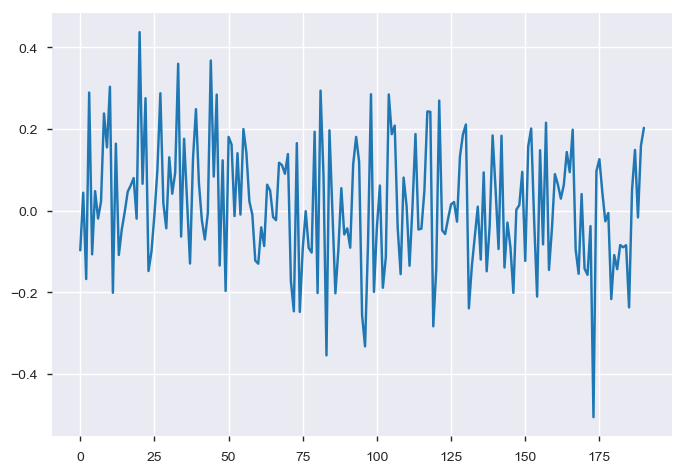

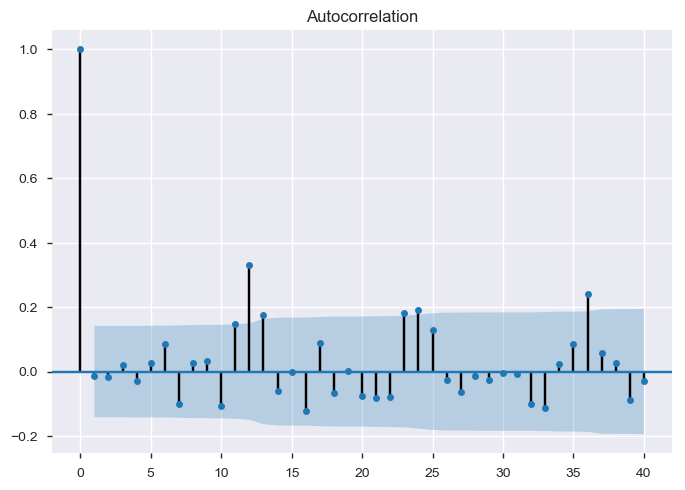

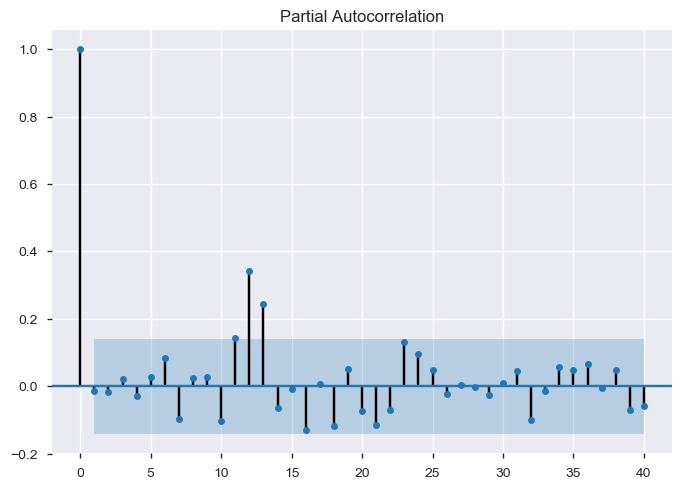

In [21]:
# 残差のチェック
resid = arma.resid
plt.plot(resid)
plt.show()
sm.graphics.tsa.plot_acf(resid, lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(resid, lags=40)
plt.show()

- 12ヶ月で高い自己相関が現れている

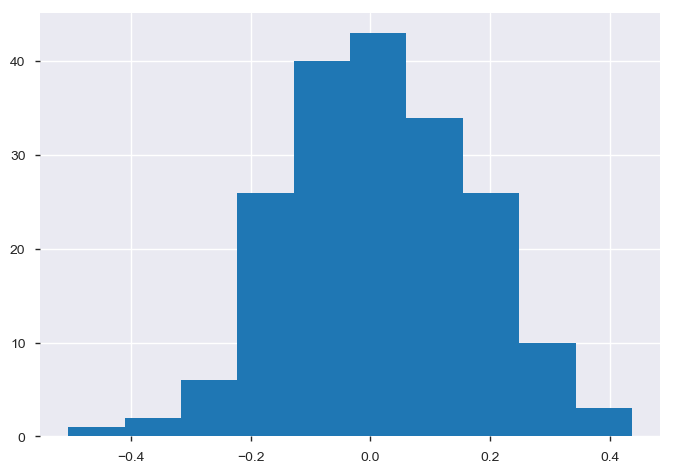

(0.023013196130277788, 0.9885593496474121)

In [22]:
plt.hist(resid)
plt.show()
stats.jarque_bera(resid)

- 第一返り値が統計量，第二返り値がp値

In [23]:
X = df["DriversKilled_log_1d"].dropna().astype(float).values
max_train_size = len(X) - 12
n_splits = len(X) - max_train_size
true = []
pred = []

tscv = TimeSeriesSplit(n_splits=n_splits, max_train_size=max_train_size)
for train_idx, test_idx in tscv.split(X):
    print(len(train_idx),len(test_idx))
    arma = ARMA(X[train_idx], order=(2,2)).fit()
    true.append(X[test_idx][0])
    pred.append(arma.predict(start=max_train_size - 1, end=max_train_size)[0])

23 14
37 14


/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if 

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

- 定常じゃないって怒られちゃってる
  - seasonalが残ってる？

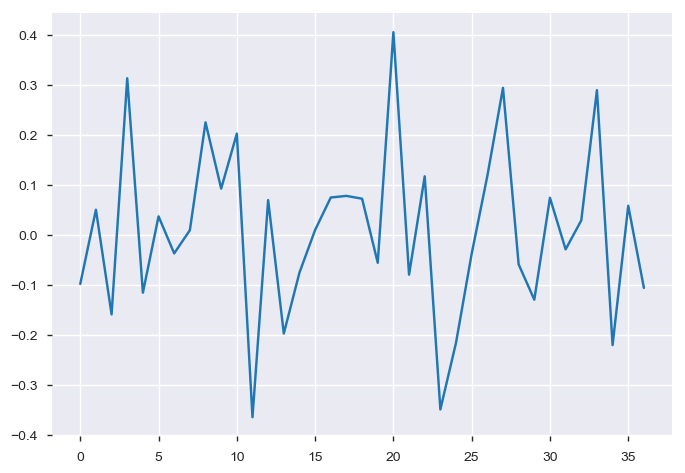

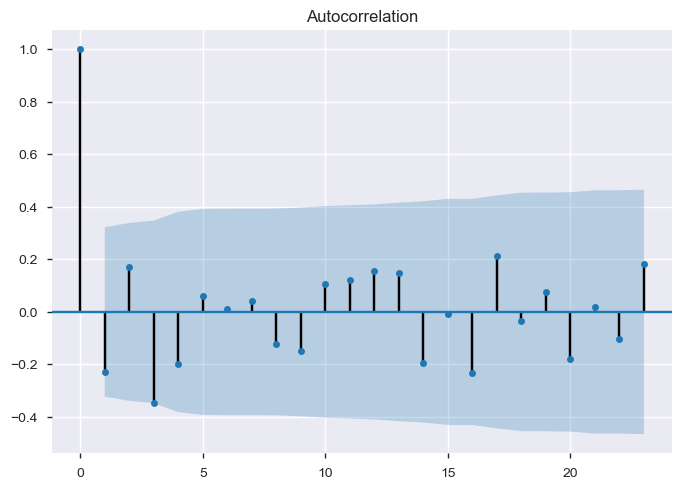

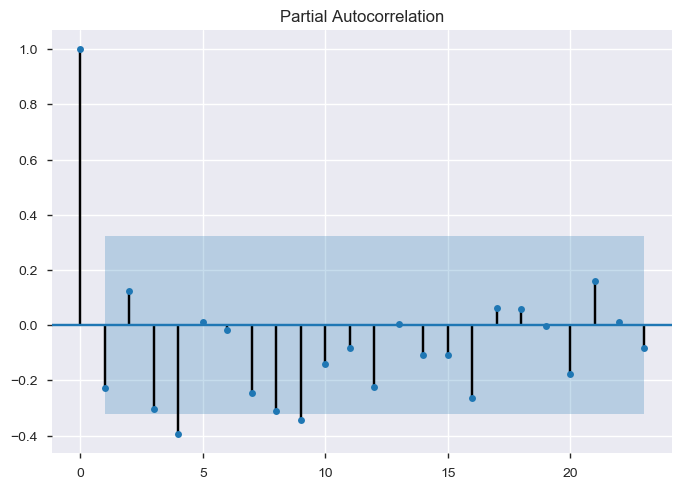

In [24]:
plt.plot(X[train_idx])
plt.show()
sm.graphics.tsa.plot_acf(X[train_idx], lags=23)
plt.show()
sm.graphics.tsa.plot_pacf(X[train_idx], lags=23)
plt.show()

In [25]:
# 季節差分を計算
df["DriversKilled_log_1d_season_shift"] = df.groupby(["month"])["DriversKilled_log_1d"].shift()
df["DriversKilled_log_1d_season_lag"] =  df["DriversKilled_log_1d"] - df["DriversKilled_log_1d_season_shift"]
df

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law,date,DriversKilled_1d,DriversKilled_2d,DriversKilled_log,DriversKilled_log_1d,year,month,DriversKilled_log_1d_season_shift,DriversKilled_log_1d_season_lag
0,107,1687,867,269,9059,0.102972,12,0,1969-01-31,NaN,NaN,4.672829,NaN,1969,1,NaN,NaN
1,97,1508,825,265,7685,0.102363,6,0,1969-02-28,-10.0,NaN,4.574711,-0.098118,1969,2,NaN,NaN
2,102,1507,806,319,9963,0.102062,12,0,1969-03-31,5.0,15.0,4.624973,0.050262,1969,3,NaN,NaN
3,87,1385,814,407,10955,0.100873,8,0,1969-04-30,-15.0,-20.0,4.465908,-0.159065,1969,4,NaN,NaN
4,119,1632,991,454,11823,0.101020,10,0,1969-05-31,32.0,47.0,4.779123,0.313215,1969,5,NaN,NaN
5,106,1511,945,427,12391,0.100581,13,0,1969-06-30,-13.0,-45.0,4.663439,-0.115684,1969,6,NaN,NaN
6,110,1559,1004,522,13460,0.103774,11,0,1969-07-31,4.0,17.0,4.700480,0.037041,1969,7,NaN,NaN
7,106,1630,1091,536,14055,0.104076,6,0,1969-08-31,-4.0,-8.0,4.663439,-0.037041,1969,8,NaN,NaN
8,107,1579,958,405,12106,0.103774,10,0,1969-09-30,1.0,5.0,4.672829,0.009390,1969,9,NaN,NaN
9,134,1653,850,437,11372,0.103026,16,0,1969-10-31,27.0,26.0,4.897840,0.225011,1969,10,NaN,NaN


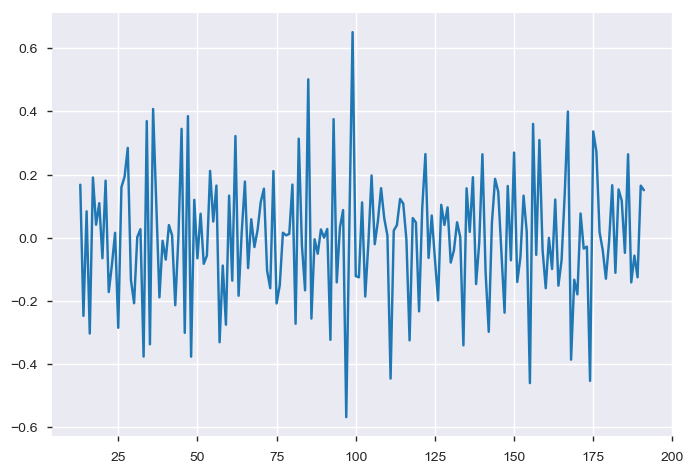

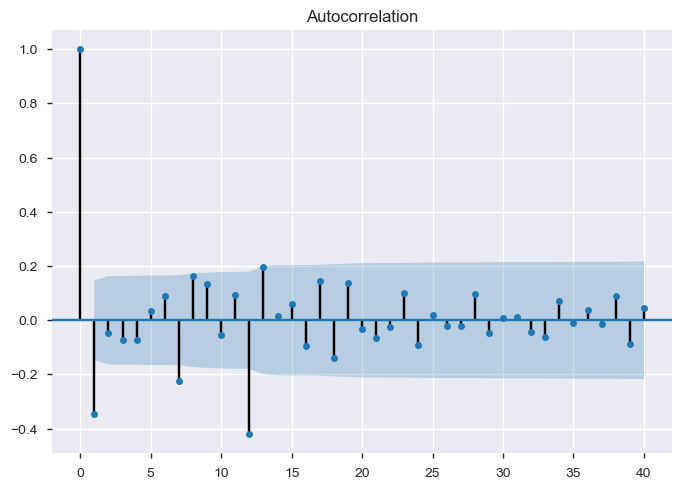

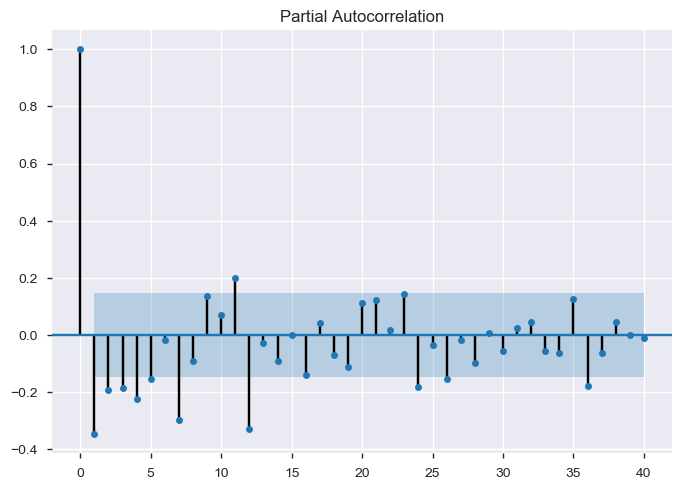

In [26]:
plt.plot(df["DriversKilled_log_1d_season_lag"])
plt.show()
sm.graphics.tsa.plot_acf(df["DriversKilled_log_1d_season_lag"].dropna(), lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(df["DriversKilled_log_1d_season_lag"].dropna(), lags=40)
plt.show()

In [27]:
res = sm.tsa.arma_order_select_ic(df["DriversKilled_log_1d_season_lag"].dropna().values, max_ar=4, max_ma=2, ic="aic", trend="nc")
print(f"aic_min_order : {res.aic_min_order}")
res.aic

/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


aic_min_order : (3, 2)


,0,1,2
0,NaN,-113.919393,-122.396423
1,-92.976033,-126.982051,-125.581870
2,-97.775392,-125.574238,-123.603840
3,-102.123717,-123.689957,-128.246358
4,-109.469935,-121.712823,-126.903879


/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  import sys


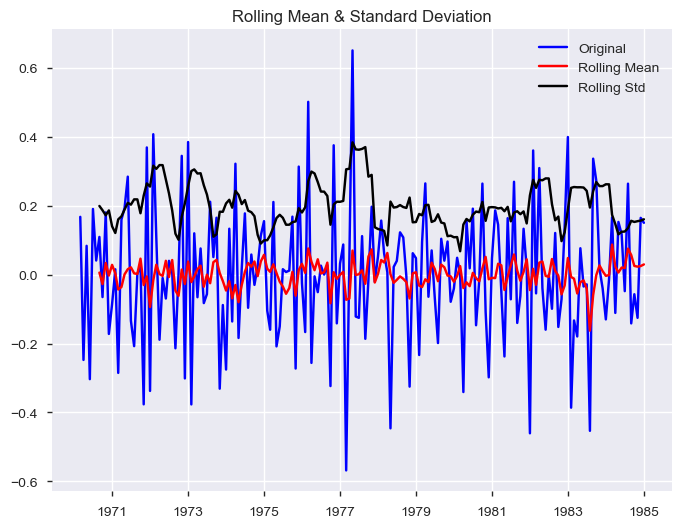

Results of Dickey-Fuller Test:
Test Statistic                  -5.066541
p-value                          0.000016
#Lags Used                      11.000000
Number of Observations Used    167.000000
Critical Value (1%)             -3.470126
Critical Value (5%)             -2.879008
Critical Value (10%)            -2.576083
dtype: float64


In [28]:
test_stationarity(df.set_index("date")["DriversKilled_log_1d_season_lag"].dropna().astype(float))

In [29]:
len(X)

191

In [30]:
X = df["DriversKilled_log_1d_season_lag"].dropna().astype(float).values
max_train_size = len(X) - 12
n_splits = len(X) - max_train_size
true = []
pred = []

tscv = TimeSeriesSplit(n_splits=n_splits, max_train_size=max_train_size)
for train_idx, test_idx in tscv.split(X):
    print(len(train_idx),len(test_idx))
    arma = ARMA(X[train_idx], order=(3,2)).fit()
    true.append(X[test_idx])
    pred.append(arma.predict(start=max_train_size - 1, end=max_train_size))

23 13
36 13


/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:654: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, 

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

---

memo

In [ ]:
df.groupby(["month"]).apply(lambda x: x.sort_values(by="year", ascending=True))["DriversKilled"].shift()

In [ ]:
df

In [ ]:
test = pd.DataFrame({'one':   ['a', 'a', 'a', 'b', 'b', 'b'],
                   'two':   ['c', 'c', 'c', 'c', 'd', 'd'],
                   'three': [1,   2,    3,   4,   5,   6]})
test = test[["one","two","three"]]
test

In [ ]:
test["shifted"] = test.groupby(["one","two"])["three"].shift()
test

In [ ]:
test["g_max"] = test.groupby(["one","two"],as_index="False")["three"].transform("max")
test